<a href="https://colab.research.google.com/github/ctrlvee/Beats-by-Dre-Consumer-Insights/blob/main/Beats_by_Dre_Consumer_Insights_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Ferdinand Virtudes  
**Date:** June 29 2024 to September 2, 2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview
Briefly describe the purpose of the project and outline the key objectives.

The purpose of this project is to collaborate with Beats by Dr. Dre to provide consumer insights that strengthen product development and refine strategy. Using tools like Python, EDA, sentiment analysis, and AI, the project focuses on data-driven decision-making to enhance business outcomes.


Key Objectives:

*   Gather and Clean Data: Collect relevant data and ensure its quality for accurate analysis.
* Perform EDA and Sentiment Analysis: Analyze data to uncover trends and understand consumer feedback.
* Leverage AI Tools for Deeper Insights: Utilize AI to extract meaningful themes and insights from customer reviews.
* Develop Strategic Recommendations: Use insights to propose data-driven improvements for product and strategy.

### 3.2 Background
Provide context about Beats by Dre and the importance of consumer sentiment analysis in the tech industry.

Beats by Dre is a leading audio brand known for its high-quality headphones, earphones, and speakers that combine cutting-edge sound technology with sleek design.

Founded by music producer Dr. Dre and record executive Jimmy Iovine, the brand has become a cultural icon, appealing to a broad audience from audiophiles to casual listeners.

Now part of Apple's ecosystem, Beats continues to innovate and expand its presence in the tech industry.


**Consumer sentiment analysis** is vital in the tech industry because it reveals how users perceive a product. For Beats, competing in a fast-paced market, understanding what customers like or dislike is crucial. This analysis extracts key insights from feedback, guiding product enhancements and marketing strategies, ultimately boosting customer satisfaction. By leveraging this data-driven approach, Beats can stay in tune with consumer preferences, predict market trends, and maintain its competitive edge.


**Bluetooth speakers ** have become popular for their convenience and portability, and choosing the best model depends on several features such as sound quality, battery life, wireless range, and extra functionalities (RJ Audio, 2023). Important factors to consider include high sound quality with minimal distortion, adequate volume capacity, and battery life tailored to specific needs. Weather resistance and additional features like voice assistants and speaker pairing can further enhance usability (RJ Audio, 2023).
In summary, the ideal Bluetooth speaker should offer a balance of sound quality, portability, ease of use, and price (RJ Audio, 2023).

## 4. Data Description

### 4.1 Data Sources
Describe the sources of your data (e.g., Amazon reviews).

The data for this analysis comes exclusively from Amazon reviews across various product brands, including Beats and its competitors. This approach captures a wide range of consumer feedback on different aspects such as sound quality, durability, design, and value for money. By analyzing reviews for multiple brands, we gain a comprehensive understanding of customer preferences and perceptions, helping identify strengths and areas for improvement relative to the competition.

### Import Libraries

In [ ]:
# Data Handling
import numpy as np
import pandas as pd

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Analysis
import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

# Gemini AI
import os
import google.generativeai as genai

### 4.2 Data Collection
Explain the data gathering process, including any challenges faced and how they were overcome.

The data gathering process involved extracting Amazon reviews for the new Beats Pill Bluetooth Speakers and similar products within the same category and price range. The goal was to collect approximately 100 reviews per product, totaling around 1,000 reviews. Here’s a breakdown of the steps and challenges faced:

Step-by-Step Process:
1. Accessing Oxylabs API:
* Signed up for a trial account on Oxylabs, which allows up to 5,000 requests during a 7-day trial period.
* Used the eCommerce Scraper API to handle Amazon’s dynamic content, simplifying the review extraction process.
2. Filling in the API Form:
* Entered the ASIN (Amazon Standard Identification Number) for each product.
* Selected a user agent (desktop) and allowed structured data parsing without JavaScript rendering.
* Chose the appropriate Amazon domain (e.g., .com for the US market) and specified the starting page number and the number of pages (up to 20).
3. Extracting Reviews:
* Extracted reviews for each product, using multiple page numbers to maximize data collection. Due to Amazon’s limitations, the extraction often capped at 100 reviews or 10 pages per product.
* To overcome this limitation, diversified the number of products and explored different page numbers to achieve the target of 1,000 reviews.
4. Exporting and Parsing Data:
* Exported the extracted data in JSON format and used provided Google Colab code to parse the JSON into a structured dataset.
* Converted the parsed data into a DataFrame and saved it as a CSV file.
5. Compiling and Merging Data:
* Repeated the extraction process for additional products.
* Loaded all CSV files into DataFrames and merged them to create a comprehensive dataset.
* Saved the final merged DataFrame as a CSV file for further analysis.

**Challenges Faced and Solutions:**
* **API Limitations:** Amazon reviews are often capped at 100 reviews or 10 pages per product. To address this, we increased the number of products and experimented with different page numbers to collect sufficient data.
* **Time Constraints:** The trial period for Oxylabs was limited to 7 days. To optimize data collection, we prepared in advance and completed all requests within the trial period.
* **Dynamic Content:** Scraping dynamic content from Amazon posed challenges, but using the Oxylabs API simplified the process, allowing us to focus on data analysis.

By following these steps, we successfully compiled a robust dataset of Amazon reviews for the targeted product category, ready for sentiment analysis and consumer insights.

### 4.3 Data Cleaning
Outline the steps taken to clean and preprocess the data, highlighting any significant decisions made during this process.



1. Merged Datasets:
* Combined all 10 product datasets into a single DataFrame to create a unified dataset for analysis.
2. Handle Missing Values:
* Detected missing values across the dataset.
* Dropped rows with missing data to ensure data integrity and accuracy.
3. Restructure Timestamp:
* Reformatted the timestamp column to properly display the date in YYYY-MM-DD format.
* Removed the old timestamp column after restructuring.
4. Clean Product Attributes:
* Standardized the product_attribute section to display colors and configurations correctly.
* Removed unnecessary words such as style: and Configuration: to keep attributes clean.
5. Add Product Information:
* Added product release dates and prices for each product to provide context for analysis.
6. Drop Irrelevant Columns:
* Dropped columns like profile_id, review_id, and author because they are not relevant for decision-making.
7. Rename Product IDs:
* Changed product_id to the corresponding product’s name or brand for better readability.

### Data Preparation

In [ ]:
df = pd.read_csv("merged_data.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'merged_data.csv'

In [ ]:
df.info()

Drop Null Values

In [ ]:
df = df.dropna()

Observations:
* All rows are unique
* Data types are valid


Restructure Timestamp



In [ ]:
def convert_date(text):
  date_str = text.split("in the United States ")[1]
  timestamp = pd.to_datetime(date_str)
  return pd.to_datetime(timestamp)

In [ ]:
df["datetime"] = df['timestamp'].apply(convert_date)
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df.head()

In [ ]:
# Drop timestamp column
df = df.drop(columns=["timestamp"])

Clean Product Attributes

In [ ]:
def grab_color(text):
    # Check if 'Color:' is in the text
    if 'Color:' in text:
        # Split the text by 'Color:'
        color_part = text.split('Color: ')[1]

        #handle the different cases where 'Style:' or 'Configuration:' may follow the color
        if 'Style:' in color_part:
            color = color_part.split('Style:')[0].strip()
        elif 'Configuration:' in color_part:
            color = color_part.split('Configuration:')[0].strip()
        else:
            color = color_part.strip()

        return color
    else:
        return None

In [ ]:
df["colors"] = df['product_attributes'].apply(grab_color)
df = df.drop(columns=["product_attributes"])
df = df.copy()
df.head()

Add Product Release Date and Prices

In [ ]:
def add_release_date(product_id):
  if product_id == 'B078HG6WNX':
    return '10/26/2015'
  elif product_id == 'B0CZN6J824':
    return "04/22/2024"
  elif product_id == 'B0CXKSCY1G':
    return "04/11/2024"
  elif product_id == 'B099TJGJ91':
    return '10/14/2021'
  elif product_id == 'B07QK2SPP7':
    return '04/19/2019'
  elif product_id == 'B09KX6RT7Q':
    return '8/17/2022 Ears'
  elif product_id == 'B0BXW4KKXK':
    return "05/08/2023"
  elif product_id == 'B07G9Y3ZMC':
    return "11/2019"
  elif product_id == 'B07T5GGR8L':
    return "06/18/2019"
  elif product_id == 'B09NWBZ7T3':
    return "02/03/2022"

df['release_date'] = df['product_id'].apply(add_release_date)

In [ ]:
def add_price(product_id):
  if product_id == 'B078HG6WNX':
    return 175.95
  elif product_id == 'B0CZN6J824':
    return 129.99
  elif product_id == 'B0CXKSCY1G':
    return 98.00
  elif product_id == 'B099TJGJ91':
    return 109.00
  elif product_id == 'B07QK2SPP7':
    return 94.95
  elif product_id == 'B09KX6RT7Q':
    return 89.00
  elif product_id == 'B0BXW4KKXK':
    return 199.99
  elif product_id == 'B07G9Y3ZMC':
    return 199.99
  elif product_id == 'B07T5GGR8L':
    return 159.95
  elif product_id == 'B09NWBZ7T3':
    return 247.57

df["price"] = df["product_id"].apply(add_price)

In [ ]:
def change_name(product_id):
  if product_id == 'B078HG6WNX':
    return 'Beats'
  elif product_id == 'B0CZN6J824':
    return "Doss"
  elif product_id == 'B0CXKSCY1G':
    return "Sony"
  elif product_id == 'B099TJGJ91':
    return 'Bose'
  elif product_id == 'B07QK2SPP7':
    return 'JBL'
  elif product_id == 'B09KX6RT7Q':
    return 'Ultimate Ears'
  elif product_id == 'B0BXW4KKXK':
    return "Anker"
  elif product_id == 'B07G9Y3ZMC':
    return "Amazon"
  elif product_id == 'B07T5GGR8L':
    return "Yamaha"
  elif product_id == 'B09NWBZ7T3':
    return "Bang & Olufsen"

df["product_id"] = df["product_id"].apply(change_name)


In [ ]:
df.head()

Drop Columns

In [ ]:
df.drop(columns=['profile_id'], inplace=True)
df.drop(columns=['review_id'], inplace=True)
df.drop(columns=['author'], inplace=True)


## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
Provide a summary of the dataset, including key statistics (mean, median, mode, standard deviation, etc.).


Rating:
* Average is high at 4.55, with most ratings being 5.
Indicates generally positive feedback.

Helpful Count:
* Low median (0) but a high maximum (2116), suggesting a few reviews received significantly more attention than others.

Date Range:
* Reviews span from November 1, 2018, to August 9, 2024, with a concentration around 2023 and 2024.

Day and Month:
* Reviews are spread across all days and months, with slight peaks in mid-month and in July.

Price:
* Average price is $150.26, with most prices clustering between $98 and $200.
Indicates a moderate price range for the products being reviewed.

In [ ]:
df.describe()

,rating,helpful_count,datetime,day,month,year,price
count,993.000000,993.000000,993,993.000000,993.000000,993.000000,993.000000
mean,4.551863,7.465257,2023-10-05 18:54:01.087613440,15.584089,6.310171,2023.279960,150.259164
min,1.000000,0.000000,2018-11-01 00:00:00,1.000000,1.000000,2018.000000,89.000000
25%,4.000000,0.000000,2023-11-25 00:00:00,7.000000,5.000000,2023.000000,98.000000
50%,5.000000,0.000000,2024-05-31 00:00:00,16.000000,7.000000,2024.000000,129.990000
75%,5.000000,2.000000,2024-07-18 00:00:00,24.000000,7.000000,2024.000000,199.990000
max,5.000000,2116.000000,2024-08-09 00:00:00,31.000000,12.000000,2024.000000,247.570000
std,0.875046,73.004026,NaN,9.081798,2.503318,1.444599,51.957069


### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

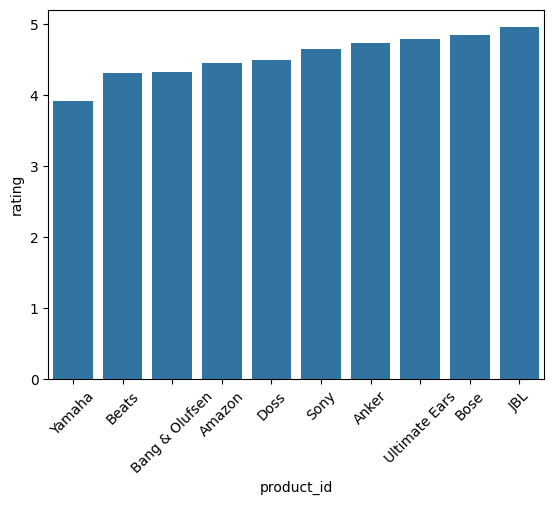

<Figure size 1500x600 with 0 Axes>

In [ ]:
# Average Rating Per Product

product_ratings = df.groupby('product_id')['rating'].mean().reset_index()
product_ratings = product_ratings.sort_values(by='rating', ascending=True)
sns.barplot(x='product_id', y='rating', data=product_ratings)
plt.xticks(rotation=45)
plt.figure(figsize=(15, 6))
plt.show()

Observations:

* Positioning:
Beats by Dre appears on the lower end of the list in terms of customer ratings compared to other brands like JBL, Bose, and Ultimate Ears. This suggests that, despite being a well-known brand, its product satisfaction is relatively lower among the products listed.

* Product Satisfaction: Lesser-known brands (such as JBL and Bose) are receiving higher ratings, indicating that these brands may be better meeting customer expectations or providing better value than Beats by Dre.

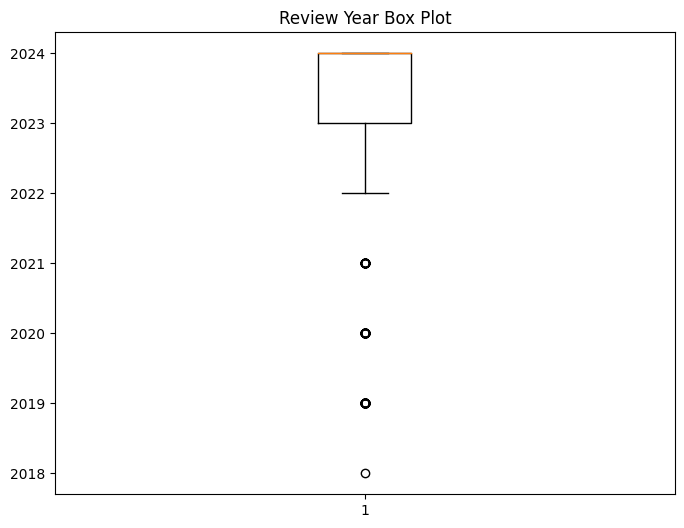

In [ ]:
# Outliers with year of review

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['year'])
plt.title('Review Year Box Plot')
plt.show()

Observations
* Review Year Trend: Most reviews are from 2023 to 2024, indicating that recent feedback is predominant.
* Outliers: Reviews from 2018-2021 are outliers, likely less relevant for assessing current product quality.
* Newer Technology: Reviews from recent years (2023-2024) may reflect better quality and build due to technological advancements.
* Action: I added product release date column to analyze how review sentiments change over a product’s lifecycle and to better assess the impact of new technology on customer satisfaction.

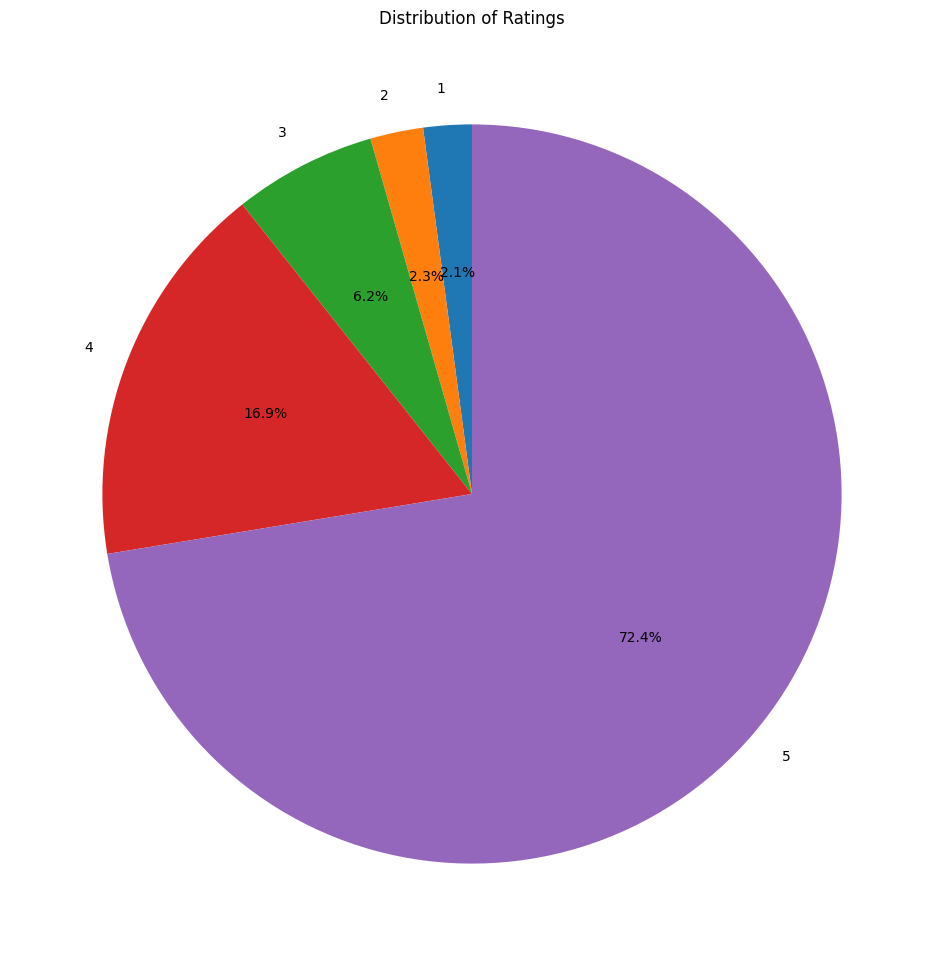

In [ ]:
# Distributions of Ratings

# Calculate the percentage distribution of each rating (1-5)
rating_distribution = df['rating'].value_counts(normalize=True) * 100

#sort
rating_distribution = rating_distribution.sort_index()

plt.figure(figsize=(12,12))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings')
plt.show()

Observation:

The majority of reviews are highly positive:
* 5-star: 72.4%
* 4-star: 16.9%
* 3-star or lower: 10.6%

This indicates strong overall customer satisfaction.

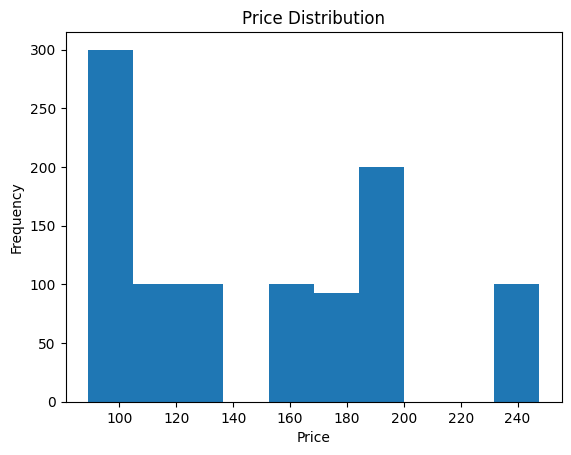

In [ ]:
#Price Buckets

df["price"].plot(kind="hist", bins=10)

plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

Observation:

* High Concentration at Lower Prices: The majority of products are priced around $100, with the highest frequency observed in this range.
* Moderate Frequency at Mid-Range Prices: There is a noticeable peak around the $180-$200 range, suggesting another popular price segment.

* Lower Frequency at Higher Prices: Fewer products are priced above $200, indicating a smaller market for higher-priced items

This distribution implies a market with a strong preference for lower-priced items, with some demand for mid-range products.

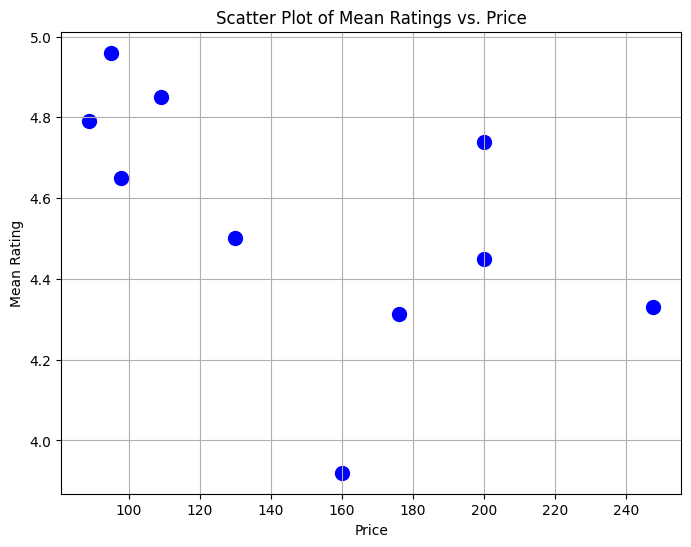

In [ ]:
# Scatter plot of price vs ratings

# Calculate the mean rating for each product
mean_ratings = df.groupby('product_id')['rating'].mean().reset_index()

# Add corresponding price
mean_ratings['price'] = df.groupby('product_id')['price'].mean().values

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mean_ratings['price'], mean_ratings['rating'], color='blue', marker='o', s=100)

plt.xlabel('Price')
plt.ylabel('Mean Rating')
plt.title('Scatter Plot of Mean Ratings vs. Price')

plt.grid(True)
plt.show()

Observation: Customer Satisfaction and Price Range

* High Satisfaction for Lower-Priced Products: Products in the $50-$150 range have the highest average ratings (around 4.8 to 5.0), suggesting strong customer satisfaction due to good value for money and affordability.

Impact on Beats by Dre:
* Lower Ratings: If Beats by Dre products are priced above $150, they may face lower satisfaction due to unmet premium expectations.

* Competitive Pressure: High satisfaction for lower-priced competitors may require Beats by Dre to either adjust prices or enhance product features to better meet customer expectations.

### 5.3 Descriptive Statistics
Discuss key findings from the descriptive statistics, highlighting any patterns, trends, or anomalies.

* Rating vs. Helpful Count: Strong negative correlation (-0.785) indicates lower-rated reviews are marked as more helpful.
* Price vs. Rating: Negative correlation (-8.34) suggests higher-priced products receive slightly lower ratings, likely due to higher expectations.
* Verified Purchases: Minimal positive impact on ratings (0.0006), showing limited influence.
* Anomalies: Extremely high correlations involving datetime may indicate data handling issues.
* Price vs. Helpful Count: High positive correlation (198.05) suggests reviews of more expensive products are marked as more helpful.
* Year Impact: Slight increase in ratings over time (0.229), possibly reflecting improved product quality or changing customer expectations.

Overall, data shows patterns in review helpfulness, pricing effects, and some anomalies needing attention.

Key Information Relevant to Beats by Dre and Other Speakers

* Consumer Distrust of Positive Reviews: High prevalence of **fake** positive reviews leads consumers to distrust 5-star ratings, which makes them rely more on lower-rated reviews.

* Perception of Helpfulness: Lower-rated reviews are seen as more credible and helpful, reflecting honest customer feedback that is less likely to be manipulated.

* Impact on Beats by Dre: If Beats by Dre has fewer negative reviews, consumers may view its ratings with suspicion, reducing trust. In contrast, brands with a mix of positive and negative reviews may appear more genuine, potentially impacting Beats by Dre's perceived credibility and customer satisfaction.

Summary:
* Lower-rated reviews are perceived as more helpful because of the high prevalence of fake positive reviews, leading consumers to distrust overly positive ratings and rely more on seemingly honest, negative feedback.

(He et al., 2022)

In [ ]:
# Acquire correlation between variables

# Drop non-numerics
df_numerics = df.copy()
df_numerics.drop(columns=['title'], inplace=True)
df_numerics.drop(columns=['content'], inplace=True)
df_numerics.drop(columns=['colors'], inplace=True)
df_numerics.drop(columns=['product_id'], inplace=True)
df_numerics.drop(columns=['release_date'], inplace=True)
df_numerics.head()

# Visualize Correlation Matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

NameError: name 'corr_matrix' is not defined

In [ ]:
# Create separate Dataframe with reviews
df_reviews = pd.DataFrame()
df_reviews['product_id'] = df['product_id']
df_reviews['rating'] = df['rating']
df_reviews['datetime'] = df['datetime']
df_reviews['content'] = df['content']


reviews = df['content']

In [ ]:
# Time series analysis - Identify trends, such as seasonal spikes
# in reviews or changes in product ratings over time.

df_reviews['datetime'] = pd.to_datetime(df_reviews['datetime'])
#Set resampling frequency
#M = Monthly
#Q = Quarterly
#Y = Yearly
df_reviews.set_index('datetime').resample('Q')['rating'].mean().plot()
plt.title('Average Rating Over Time')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.show()

Observations on Average Rating Over Time (Quarterly)

* 2019: Persistent decline in average ratings, possibly due to unmet customer expectations, product issues, or increased competition.

* 2020: Brief rating increase in the first quarter, followed by a decline, likely impacted by the COVID-19 pandemic, which altered purchasing behavior and product usage.

* 2021-2023: Volatile ratings, suggesting fluctuations in consumer sentiment. Long product life cycles and unchanged product offerings may have contributed to varying reviews over time.

* 2024: Recovery in ratings, reaching pre-2019 levels, indicating a potential positive shift in product quality, consumer satisfaction, or brand perception.

In [ ]:
# Product Rating vs. Review Length
# Scatter Plot: Examine the relationship between the length of a review and the rating given.
# Chart Type: Scatter Plot
# Insight: Determine if longer reviews tend to be more positive or negative

df_reviews['review_length'] = df_reviews['content'].apply(len)
plt.figure(figsize=(20, 8))
sns.scatterplot(x='review_length', y='rating', data=df_reviews)
sns.kdeplot(x='review_length', y='rating', data=df_reviews, levels=5, color='red', linewidths=1)

plt.xticks(ticks=range(0, 9000, 200), rotation=45)
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

Observations: Review Length vs. Rating

* Review Concentration: Most reviews are short (0-200 characters), regardless of rating.
Outliers: Longer reviews exist across all ratings but are rare.

Relevance to Beats by Dre

* Short Reviews: Brief reviews may not capture detailed customer sentiment, leading to high sentiment scores but lower overall ratings.

* Detailed Feedback in Outliers: Longer reviews could provide deeper insights into why customers rate Beats by Dre lower, revealing unmet expectations or specific issues not captured in shorter reviews.

In [ ]:
sns.kdeplot(x='review_length', y='rating', data=df_reviews, cmap="Reds", fill=True)
plt.title('Contour Plot of Review Length vs. Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()


## 6. Sentiment Analysis

### 6.1 Methodology
Explain the sentiment analysis techniques used (e.g., TextBlob, NLTK) and provide code snippets.

NLTK (Natural Language Toolkit):

**Overview: ** NLTK is a comprehensive library in Python for natural language processing (NLP). It provides tools for text processing, including tokenization, classification, stemming, tagging, parsing, and semantic reasoning.

**Technique Used: ** For sentiment analysis, we use the
Sentiment Intensity Analyzer (SIA) from NLTK, which employs the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon. VADER is specifically tuned for analyzing sentiments expressed in social media and works well with short text snippets.
Code Snippet:

In [ ]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Sample text
text = "These apples are surprisingly amazing for the price that we bought them for"

# Perform sentiment analysis
sentiment = sia.polarity_scores(text)
print(sentiment)

#Output: The output is a dictionary with sentiment scores: neg (negative),
#neu (neutral), pos (positive), and compound (overall sentiment score).

**Overview:** TextBlob is a simpler library for NLP
tasks, making it easy to perform common text processing operations. It is particularly user-friendly for sentiment analysis.

**Technique Used:** TextBlob calculates sentiment polarity and subjectivity. Polarity measures the positivity or negativity of the text (-1 to 1), while subjectivity measures how much of the text is opinion-based (0 to 1).

In [ ]:
from textblob import TextBlob

# Sample text
text = "These apples are surprisingly amazing for the price that we bought them for"

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment
print(sentiment)

#Output: The output provides two metrics: polarity
#(sentiment strength from -1 to 1) and subjectivity (degree of personal opinion from 0 to 1).


### 6.2 Results
Present the sentiment analysis results, including visualizations of sentiment distribution, and discuss the overall sentiment towards Beats by Dre products.


Results:
* The sentiment analysis reveals that the reviews for Beats by Dre generally contain positive language, but this does not translate into higher product ratings.

Visualizations:

* The bar chart indicates that Beats by Dre has one of the higher average sentiment scores among competitors, yet actual product ratings may not align with these sentiments.

Discussion of Overall Sentiment:

* The overall sentiment toward Beats by Dre products is positive in textual content but may be tempered by unmet expectations, price sensitivity, or other specific disappointments that lead to lower final ratings. This suggests a gap between perceived value and customer expectations that the brand might need to address to improve its ratings.

In [ ]:
def get_sentiment(review):
  return sia.polarity_scores(review)

df_reviews['sentiment'] = reviews.apply(get_sentiment)

In [ ]:
# Extract sentiment scores into their own columns
df_reviews['neg'] = df_reviews['sentiment'].apply(lambda x: x['neg'])
df_reviews['neu'] = df_reviews['sentiment'].apply(lambda x: x['neu'])
df_reviews['pos'] = df_reviews['sentiment'].apply(lambda x: x['pos'])
df_reviews['compound'] = df_reviews['sentiment'].apply(lambda x: x['compound'])


In [ ]:
df_reviews.head()

In [ ]:
# Using TextBlob

df_reviews['sentiment_textblob'] = df['content'].apply(lambda x: TextBlob(x).sentiment)
df_reviews['polarity'] = df_reviews['sentiment_textblob'].apply(lambda x: x.polarity)
df_reviews['subjectivity'] = df_reviews['sentiment_textblob'].apply(lambda x: x.subjectivity)
df_reviews.head()
df_reviews.to_csv('filename.csv', index=False)

In [ ]:
# Average sentiment score per product

product_sentiments = df_reviews.groupby('product_id')['polarity'].mean().reset_index()
product_sentiments = product_sentiments.sort_values(by='polarity', ascending=True)
sns.barplot(x='product_id', y='polarity', data=product_sentiments)
plt.xticks(rotation=45)
plt.title('Average Sentiment Score per Product')
plt.xlabel('Product')
plt.ylabel('Average Sentiment Score')
plt.figure(figsize=(15, 6))
plt.show()

Observations:

Expectations vs. Reality:
* Customers may have high expectations for Beats by Dre due to its strong brand reputation. When the product doesn't fully meet these expectations, even slightly, customers may rate it lower despite mentioning some positive aspects in their reviews.

Brand Premium Effect:
* As a premium brand, Beats by Dre products are often priced higher. Customers might expect top-tier performance and quality for the price they pay. If they perceive any shortcomings, their overall rating could be negatively impacted, regardless of some positive features they discuss.

Selective Emphasis in Reviews:
* In reviews, customers may mention specific positive features (e.g., sound quality) while still rating the product lower due to other issues (e.g., durability, value for money). This can cause a mismatch between the sentiment expressed in the text and the overall rating given.

In [ ]:
# Comparison between review sentiment analysis and average ratings

#Step 2: Reduce the size of the DataFrame by selecting only the necessary columns
df_reviews_subset = df_reviews[['product_id', 'polarity', 'rating']]

# Group by 'product_id' and calculate the mean for 'polarity' and 'rating'
product_sentiments = df_reviews_subset.groupby('product_id')['polarity'].mean().reset_index()
product_ratings = df_reviews_subset.groupby('product_id')['rating'].mean().reset_index()

# Normalize ratings to the range of polarity scores
# Assuming polarity ranges from -1 to 1, we normalize ratings similarly
min_rating = product_ratings['rating'].min()
max_rating = product_ratings['rating'].max()

# Normalize ratings to be between -1 and 1
product_ratings['normalized_rating'] = 2 * (product_ratings['rating'] - min_rating) / (max_rating - min_rating) - 1

# Merge the data on 'product_id'
combined_data = pd.merge(product_sentiments, product_ratings[['product_id', 'normalized_rating']], on='product_id')

# Set the position of the bars
bar_width = 0.4
r1 = np.arange(len(combined_data))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(15, 6))

# Plot the bars
plt.bar(r1, combined_data['polarity'], color='blue', width=bar_width, edgecolor='grey', label='Sentiment Score')
plt.bar(r2, combined_data['normalized_rating'], color='orange', width=bar_width, edgecolor='grey', label='Normalized Rating')

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Score')
plt.title('Comparison of Average Sentiment Score and Normalized Rating per Product')
plt.xticks([r + bar_width / 2 for r in range(len(combined_data))], combined_data['product_id'], rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
#Scale the sentiment scores vs the review ratings

# Step 2: Reduce the size of the DataFrame by selecting only the necessary columns
df_reviews_subset = df_reviews[['product_id', 'polarity', 'rating']]

# Group by 'product_id' and calculate the mean for 'polarity' and 'rating'
product_sentiments = df_reviews_subset.groupby('product_id')['polarity'].mean().reset_index()
product_ratings = df_reviews_subset.groupby('product_id')['rating'].mean().reset_index()

# Scaling the ratings by a factor to match the range of polarity
scaling_factor = 0.2  # Adjust this factor based on your needs
product_ratings['scaled_rating'] = product_ratings['rating'] * scaling_factor

# Merge the data on 'product_id'
combined_data = pd.merge(product_sentiments, product_ratings[['product_id', 'scaled_rating']], on='product_id')

# Set the position of the bars
bar_width = 0.4
r1 = np.arange(len(combined_data))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(15, 6))

# Plot the bars
plt.bar(r1, combined_data['polarity'], color='blue', width=bar_width, edgecolor='grey', label='Sentiment Score')
plt.bar(r2, combined_data['scaled_rating'], color='orange', width=bar_width, edgecolor='grey', label='Scaled Rating')

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Score')
plt.title('Comparison of Average Sentiment Score and Scaled Rating per Product')
plt.xticks([r + bar_width / 2 for r in range(len(combined_data))], combined_data['product_id'], rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Observations: Beats by Dre Sentiment vs. Scaled Rating

* Discrepancy Noted: Beats by Dre has a high sentiment score but a lower scaled rating, unlike brands like Amazon, Anker, and Bang & Olufsen, where scores align more closely.

Potential Causes:
* NLP Limitations: Sentiment analysis may miss nuanced criticisms within positive reviews.
* Conservative Ratings: Positive sentiments are offset by lower ratings due to unmet expectations or perceived shortcomings.
* Reviewer Bias: As a popular brand, Beats by Dre faces higher expectations, leading to stricter ratings.

Implications:
* Customers appreciate aspects of Beats by Dre but are critical due to high brand expectations.
* Addressing specific product concerns and managing expectations may help close the gap between sentiment and ratings.



In [ ]:
df_reviews.head()

In [ ]:
# Sentiment Distribution for Top Products
# Violin Plot: Show the distribution of sentiment scores for the top products.
# Chart Type: Violin Plot
# Insight: Compare sentiment variability across top products.

top_products = df_reviews['product_id'].value_counts().head(5).index
sns.violinplot(x='product_id', y='polarity', data=df_reviews[df_reviews['product_id'].isin(top_products)])
plt.title('Sentiment Distribution for Top Products')
plt.xlabel('Product')
plt.ylabel('Polarity')
plt.show()


Observations: Sentiment Distribution for Top Products

Sentiment Spread:
* All products show a wide range of sentiment polarity, from negative (-0.75) to positive (1.0).
Most sentiments are concentrated around neutral to slightly positive (0 to 0.5), indicating mixed feelings among customers.

Distribution Similarity:
* The sentiment distribution shapes are similar across products like Amazon, Anker, Bang & Olufsen, Bose, and Doss, suggesting that consumer sentiment tends to vary similarly for different brands.

Relevance to Beats by Dre
* Although Beats by Dre isn't depicted, similar sentiment patterns could be expected. High brand recognition may lead to a diverse range of sentiments due to varying customer expectations, resulting in a similar spread from negative to positive. Addressing specific concerns highlighted in more polarized reviews could help improve overall product perception.

In [ ]:
# Categorize into buckets of positive, negative, or neutral sentiment

def sentiment_analysis_summary(df, text_col):
  sentiments = {'Positive':0, 'Negative':0, 'Neutral':0}
  for r in df[text_col]:
    blob = TextBlob(r)
    polarity = blob.sentiment.polarity
    if polarity > 0:
      sentiments['Positive'] += 1
    elif polarity < 0:
      sentiments['Negative'] += 1
    else:
      sentiments['Neutral'] += 1
  return sentiments


sentiment_analysis_summary(df_reviews, 'content')



In [ ]:
# Aggregate sentiment scores to assess overall consumer sentiment

# Count the number of reviews in each sentiment category
sentiment_summary = df_reviews['sentiment'].value_counts()

# Calculate the percentage of each sentiment
sentiment_summary_percentage = df_reviews['sentiment'].value_counts(normalize=True) * 100

# Output the result
print("Sentiment Summary:")
print(sentiment_summary)
print("\nSentiment Summary (Percentage):")
print(sentiment_summary_percentage)

## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Briefly explain how Gemini AI was used to extract insights and include any relevant code snippets or explanations.

Gemini AI was used to analyze customer reviews and extract sentiment insights by processing text data. The tool leverages natural language processing (NLP) to identify patterns, key themes, and overall sentiment (positive, negative, neutral) within large datasets.

In [ ]:
from getpass import getpass

os.environ['GEMINI_API_KEY'] = getpass('Enter your Gemini API key:')


# Function to analyze reviews using Gemini AI
def analyze_reviews (reviews, api_key, prompt):
  genai.configure(api_key=api_key)
  model = genai. GenerativeModel(
      model_name="gemini-1.5-flash",
      generation_config={
      "temperature": 1,
      "top_p": 0.95,
      "top_k": 64,
      "max_output_tokens": 8192,
      "response_mime_type": "text/plain",
    },
  )

  chat_session = model.start_chat(history=[])
  response = chat_session.send_message(prompt)
  return response.text

In [ ]:
base = df_reviews[['product_id', 'content']]
base

### 7.2 Key Insights
Summarize the key insights generated by Gemini AI, including specific examples of prompts used and the responses received.


Key Insights Summarized

Overall, customers appreciate speakers that balance sound quality, durability, ease of use, and price. However, connectivity issues, app limitations, and some specific sound quality concerns are common drawbacks.

Common Findings Across All Reviews:

1. Common Complaints or Issues:
* Sound Quality Issues:
Lack of deep bass or muddy bass at high volumes.
Issues with midrange clarity and treble harshness.
Spatial or stereo sound features not performing as expected.
* Connectivity Problems:
Frequent Wi-Fi and Bluetooth connection drops or difficulties in pairing.
Problems with multi-device connectivity and audio synchronization.
* Battery and Charging Concerns:
Battery life not meeting advertised duration, especially with advanced features enabled.
Complaints about charging issues or short charging cables.
* App and Feature Limitations:
Users report app bugs, limited features, or a lack of customization options.
Discontent with mandatory app use for essential functions.
* Physical and Design Concerns:
Size and weight affecting portability.
Limited color options or aesthetic features.
Durability concerns with refurbished products or specific components.
2. Ease of Use:
* Generally Positive Feedback:
Most products are praised for easy setup and straightforward controls.
Seamless Bluetooth connectivity and user-friendly apps (with some exceptions).
Portability and intuitive design are frequently mentioned.
* Minor Usability Issues:
Occasional difficulty with setup instructions or connecting to multiple devices.
Some features, such as spatial audio or advanced sound modes, require specific placements or settings, which can be challenging.
3. Reasons for Purchase:
* Sound Quality:
Many users prioritize rich, clear sound with good bass and balanced audio for a variety of music genres.
Speakers with customizable EQ settings are particularly appealing.
* Design and Portability:
Compact, durable designs with waterproof or rugged features are highly valued for outdoor use.
Lightweight and easy-to-carry speakers with practical design elements like handles or straps are preferred.
* Value for Money:
High sound quality and durability for the price point, especially when discounted or on sale.
Attractive offers on refurbished or renewed models.
* Brand Trust and Features:
Well-known brands and built-in features like smart assistants (Alexa) add to the purchase appeal.
Specific features like multi-device connectivity, long battery life, and unique sound enhancement modes are key selling points.



In [ ]:
# Analyzing the main contents
# Extracting Pain Points:
# To identify common issues or complaints in customer reviews, you
# can create a prompt that specifically asks Gemini AI to summarize the negative aspects.

# Create individual dataframes for each product ID
amazon_df = base[base['product_id'] == 'Amazon']
anker_df = base[base['product_id'] == 'Anker']
bg_df = base[base['product_id'] == 'Bang & Olufsen']
beats_df = base[base['product_id'] == 'Beats']
bose_df = base[base['product_id'] == 'Bose']
doss_df = base[base['product_id'] == 'Doss']
jbl_df = base[base['product_id'] == 'JBL']
sony_df = base[base['product_id'] == 'Sony']
ue_df = base[base['product_id'] == 'Ultimate Ears']
yamaha_df = base[base['product_id'] == 'Yamaha']

In [ ]:
# Define the base prompt
pmt1 = "Analyze the following reviews and summarize the reviews and key pain points. :\\n\\n"

# Function to get unique insights for each DataFrame
def get_unique_insights(df, prompt):
    pmt_o = prompt.join(df)
    analysis = analyze_reviews(df, os.environ['GEMINI_API_KEY'], pmt_o)
    print(analysis)
    return analysis

# List of DataFrames
dfs = [amazon_df, anker_df, bg_df, beats_df, bose_df, doss_df, jbl_df, sony_df, ue_df, yamaha_df]

# Loop through each DataFrame to analyze reviews
for df in dfs:
    get_unique_insights(df['content'], pmt1)


In [ ]:
# Unique Insight 1 -
# Identify common complaints across all devices

pmt2 = 'Identify the most common complaints or issues mentioned in these reviews'
for df in dfs:
    get_unique_insights(df['content'], pmt2)


In [ ]:
# Unique Insight 2 -
# "How do customers describe the ease of use or usability of the product in these reviews?"

pmt3 = "How do customers describe the ease of use or usability of the product in these reviews?"
for df in dfs:
    get_unique_insights(df['content'], pmt3)

In [ ]:
# Unique Insight 3
# "What reasons do customers give for purchasing this product based on these reviews?"

pmt4 = "What reasons do customers give for purchasing this product based on these reviews?"
for df in dfs:
    get_unique_insights(df['content'], pmt4)

### 7.3 Interpretation
Discuss how these insights can be interpreted and their relevance to Beats by Dre.

The insights highlight key areas for Beats by Dre to enhance its product offerings:

1. Sound Quality: Prioritize clear, balanced audio across all frequencies, not just bass. Offer customizable EQ settings to cater to individual preferences.
2. Connectivity: Improve Bluetooth and Wi-Fi stability to minimize connection issues and enhance compatibility with various smart home ecosystems.
3. Ease of Use: Focus on intuitive setup, simplified controls, and reducing app dependency for basic functions to appeal to a broader audience.
4. Battery Life and Portability: Ensure consistent battery performance, especially when using advanced features. Emphasize portability in design without sacrificing sound quality.
5. Durability and Design: Enhance product durability with materials that withstand outdoor use while maintaining aesthetic appeal. Consider expanding color options.
6. Pricing and Value: Emphasize the value through superior quality, innovative features, and occasional promotions to align with consumer expectations of competitive pricing.

By addressing these areas, Beats by Dre can better meet consumer needs, differentiate from competitors, and maintain its position as a premium audio brand.

## 8. Comparative Analysis

### 8.1 Competitor Overview
List the competitors analyzed and provide a brief overview of their market positioning.

The following products were analyzed as competitors to the Beats Pill+ (Renewed):

1. DOSS Extreme Boom Party Sync
* Market Positioning: A mid-range Bluetooth speaker known for its high output (100W stereo sound) and enhanced features like rich bass, 20-hour playtime, a built-in power bank, and a mixed-color light feature. The DOSS Extreme Boom is targeted at users looking for a durable, outdoor-friendly speaker with a strong bass performance and additional utility features such as waterproofing (IPX6 rating) for camping, beach, or outdoor use.
* [DOSS Extreme Boom Party Sync](https://www.amazon.com/DOSS-Extreme-Boom-Party-Sync-Travel-Copper/dp/B0CZN6J824/)
2. Sony ULT Field 1
* Market Positioning: A versatile Bluetooth speaker designed for durability and portability. It is waterproof, shockproof, and features a detachable strap for easy transport. Sony's ULT Field 1 targets users who want a reliable speaker with good sound quality for outdoor adventures, providing strong battery life and durability.
* [Sony ULT Field 1](https://www.amazon.com/Sony-Bluetooth-Waterproof-Shockproof-Detachable/dp/B0CXKSCY1G/)
3. Bose SoundLink Flex
* Market Positioning: Positioned as a premium portable speaker with Bose's signature sound quality. It offers robust features such as waterproofing (IP67 rating), rugged durability, and a long-lasting battery. The SoundLink Flex is aimed at consumers who prioritize high-quality sound and durable design, suitable for both home and outdoor use.
* [Bose SoundLink Flex](https://www.amazon.com/Bose-SoundLink-Bluetooth-Portable-Waterproof/dp/B099TJGJ91/)
4. JBL Flip Essential 2
* Market Positioning: A mid-tier portable Bluetooth speaker known for its durability, water resistance, and balanced sound profile. The JBL Flip Essential 2 targets consumers looking for a reliable and affordable speaker for casual listening, especially in outdoor settings. It is popular among younger audiences for its rugged design and portability.
* [JBL Flip Essential 2](https://www.amazon.com/JBL-Waterproof-Portable-Bluetooth-Speaker/dp/B07QK2SPP7/)
5. Ultimate Ears WONDERBOOM 3
* Market Positioning: A compact, waterproof Bluetooth speaker designed for portability and ruggedness. With a 360-degree sound output and floatable design, it appeals to active users who need a speaker that can handle various environments, including water. The WONDERBOOM 3 is positioned towards a younger demographic seeking a fun, durable speaker for adventurous activities.
* [Ultimate Ears WONDERBOOM 3](https://www.amazon.com/WONDERBOOM-Bluetooth-360-Degree-Waterproof-Dustproof/dp/B09KX6RT7Q)
6. Anker Soundcore Motion X600
* Market Positioning: A budget-friendly option offering good sound quality and durability. Known for its affordability, the Anker Soundcore line targets consumers who want reliable audio performance without a high price tag, providing features such as long battery life, water resistance, and multiple connectivity options.
* [Anker Soundcore Motion X600](https://www.amazon.com/gp/product/B0BXW4KKXK)
7. Amazon Echo Studio
* Market Positioning: A high-end smart speaker with Alexa integration, designed to provide superior sound quality with spatial audio features like Dolby Atmos. The Echo Studio targets consumers who are looking for a smart home hub with advanced sound capabilities, combining convenience with high-quality audio for home use.
* [Amazon Echo Studio](https://www.amazon.com/Echo-Studio/dp/B07G9Y3ZMC)
8. Yamaha YAS-209 Soundbar
* Market Positioning: A soundbar and subwoofer combo aimed at home entertainment setups. Yamaha's YAS-209 offers clear voice technology, Alexa integration, and wireless subwoofer capabilities, targeting users who want to improve their TV sound quality with additional smart features.
* [Yamaha YAS-209 Soundbar](https://www.amazon.com/Yamaha-YAS-209-Wireless-Subwoofer-Bluetooth/dp/B07T5GGR8L)
9. Bang & Olufsen Beosound Explore
* Market Positioning: A premium portable speaker that combines luxury design with high-quality sound. The Beosound Explore is water-resistant, robust, and offers extended battery life, aimed at consumers who prioritize aesthetics and superior audio performance in a portable package.
* [Bang & Olufsen Beosound Explore](https://www.amazon.com/Bang-Olufsen-Beosound-Explore-Waterproof/dp/B09NWBZ7T3)

### 8.2 Comparison of Sentiments
Compare the sentiment analysis results of Beats by Dre with its competitors using visualizations to highlight differences and similarities.

1. Sentiment Distribution for Top Products (Violin Plot)
* Amazon and Bose show a broader distribution of sentiment, ranging from very negative to highly positive. This indicates mixed customer experiences, with some users having extremely positive sentiments while others are quite negative.
* Anker, Bang & Olufsen, and Doss have narrower distributions that are more centered around a positive range. This suggests a more consistent customer experience, where most feedback is moderately positive.
* Amazon and Bose may have variability in their product performance or customer expectations, leading to a wider range of sentiment scores.
2. Comparison of Average Sentiment Score and Scaled Rating per Product (Bar Chart)
* Anker and JBL show a strong alignment between sentiment scores and scaled ratings, suggesting that customer reviews generally match the overall product ratings.
* Beats and Bose show relatively higher sentiment scores compared to their scaled ratings, indicating that while customers may express positive sentiments, they might still rate the product conservatively. This could reflect high customer expectations not fully met by the product.
* Yamaha has the lowest sentiment score and rating alignment, suggesting a disconnect between customer satisfaction and their overall product experience. This might imply significant dissatisfaction or unmet expectations.
3. Comparison of Average Sentiment Score and Normalized Rating per Product (Bar Chart)
* Anker and Bose have high normalized ratings relative to their sentiment scores, suggesting that while individual reviews may express mixed feelings, the overall ratings are more favorable.
* Yamaha has a markedly lower normalized rating, which aligns with its lower sentiment score. This could indicate consistent dissatisfaction or issues across its customer base.
* JBL and Beats show relatively high normalized ratings, indicating that despite mixed or average sentiment scores, customers tend to give them better overall ratings.
4. Average Sentiment Score per Product (Bar Chart)
* JBL and Beats have the highest average sentiment scores, suggesting that customers generally have a more positive perception of these brands compared to others.
* Yamaha has the lowest average sentiment score, indicating that it might be struggling with customer satisfaction.
* Other brands like Amazon, Anker, Bang & Olufsen, Doss, and Sony are clustered closer together in terms of average sentiment, suggesting a generally favorable but not outstanding perception.

Overall Insights:
* Beats by Dre shows a higher sentiment score but does not necessarily have the highest scaled ratings, which could suggest that while customers speak positively about the brand, their ratings might be moderated by certain unmet expectations or specific issues.
* JBL consistently performs well in both sentiment score and scaled ratings, indicating strong customer satisfaction and perceived value.
* Yamaha appears to be the weakest performer in terms of both sentiment and ratings, suggesting it needs to address specific product or service-related concerns to improve customer perception.
* The sentiment scores suggest that JBL and Beats are currently leading in customer satisfaction among the brands analyzed, while Yamaha may need significant improvements to compete effectively.

### 8.3 SWOT Analysis
Conduct a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.

Strengths:
* High average sentiment score indicates strong brand perception.
* Well-recognized brand with a loyal customer base.

Weaknesses:
* Lower scaled ratings suggest unmet customer expectations.
* Limited differentiation in product features compared to competitors.

Opportunities:
* Expand features to align with customer preferences (e.g., battery life, waterproofing).
* Leverage positive sentiment to increase market share.

Threats:
* Intense competition from brands like Bose, JBL, and Sony.
* Risk of negative sentiment due to high customer expectations.

## 9. Strategic Recommendations

### 9.1 Product Improvements
Based on the analysis, suggest specific product improvements.

1. Quality Consistency: The data indicates some volatility in ratings between 2021 and 2023, which suggests potential inconsistencies in product quality. Ensuring consistent product quality, especially in the more affordable product range ($50-$150), could help maintain higher customer satisfaction.
2. Enhanced User Experience: Some reviews show a discrepancy between sentiment and ratings, indicating that while customers may express positive sentiments, their overall ratings do not always match. This could suggest unmet expectations or product performance issues.
3. Addressing common pain points, such as battery life, sound quality, or product durability, could help bridge this gap.
4. Targeted Pricing Strategy: As lower-priced products ($50-$150) tend to have higher satisfaction rates, it would be beneficial to maintain or expand offerings in this range. Introducing features typically found in higher-priced models into this segment could enhance perceived value.
5. Customer Education and Support: To address the discrepancies between perceived quality and actual product ratings, investing in customer education (e.g., product guides, usage tips) and support services (like extended warranties or easy return policies) might help manage customer expectations better and improve overall satisfaction.
6. Improved Feedback Loop: Incorporating customer feedback more effectively into product development cycles can address specific concerns and improve future iterations of the product.

### 9.2 Marketing Strategies
Provide recommendations for marketing strategies that could enhance consumer perception and satisfaction.

1. Leverage Customer Reviews and Testimonials
* Strategy: Showcase positive customer reviews and testimonials to build trust and credibility.
* Action: Highlight reviews on the website and social media; encourage satisfied customers and influencers to share their experiences (Patel, 2023).
2. Optimize Content Marketing and SEO
* Strategy: Create targeted content that aligns with the interests of music lovers, athletes, and style-conscious consumers.
* Action: Develop blogs and videos on topics like “Best Headphones for Running” and collaborate with influencers to boost SEO visibility (Patel, 2023).
3. Use Limited-Time Offers and Promotions
* Strategy: Encourage quicker purchase decisions with time-sensitive deals.
* Action: Run seasonal promotions, student discounts, and exclusive deals to create urgency and leverage FOMO (Patel, 2023).
4. Cross-Selling and Upselling
* Strategy: Promote accessories and premium versions to existing customers.
* Action: Recommend complementary products and features, such as cases or noise-canceling options, during the checkout process (Patel, 2023).

### 9.3 Future Research
Suggest areas for future research or additional data that could be collected to further enhance the analysis.

1. Detailed Demographic Data: Collecting more granular demographic data (age, location, gender) could provide insights into how different consumer groups perceive the products and identify tailored marketing strategies.
2. Longitudinal Study of Sentiment Changes: Conduct a more detailed analysis of sentiment changes over time, particularly focusing on how new product releases, marketing campaigns, or external events (like economic downturns) impact consumer perceptions.
3. Competitor Analysis: Gather more data on competitor products, including pricing, features, and consumer sentiment. This will help identify gaps in the current product lineup and opportunities for differentiation.
4. Review Text Analysis: Perform a deeper textual analysis of customer reviews to identify specific themes or recurring topics (e.g., complaints about battery life, praise for sound quality). This can guide targeted improvements.
5. Cross-Platform Sentiment Comparison: Expand the dataset to include reviews and sentiments from multiple platforms (like social media, e-commerce sites, etc.) to provide a more comprehensive view of consumer perception.

## 10. Conclusion
Summarize the key findings and their implications, and reflect on the overall project and its contribution to understanding consumer sentiment for Beats by Dre.


1. Sentiment Analysis:
* A majority of reviews are positive, with 72.4% of 5-star and 16.9% of 4-star reviews indicating high customer satisfaction. However, there is a discrepancy between sentiment scores and ratings, suggesting some dissatisfaction that isn't fully captured by sentiment analysis alone.
2. Product Rating Trends:
* There was notable volatility in product ratings between 2021 and 2023, potentially due to changing consumer expectations or market conditions. The ratings have shown a recovery trend in 2024, suggesting a recent improvement in customer satisfaction.
3. Price vs. Rating:
* Products in the lower price range ($50-$150) tend to have higher satisfaction rates, suggesting that value for money is a key factor for customers. There is also a slight negative correlation between year and price, indicating that prices might have decreased over time, potentially driving higher satisfaction.

Conclusion:

The analysis highlights key areas for product improvement and future research to understand consumer sentiment better. It suggests that Beats by Dre could benefit from maintaining quality consistency, enhancing user experience, adopting a targeted pricing strategy, improving customer education and support, and incorporating customer feedback into product development. Future research should focus on detailed demographic data, longitudinal sentiment trends, competitor analysis, deeper review text analysis, and cross-platform sentiment comparisons.

## 11. References
List all the sources, tools, and references used in the project.


Sources
1. Research Papers:
* He, S., et al. (2022). Detecting fake-review buyers using network structure: Direct evidence from Amazon. PNAS, 119(47), e2211932119. https://doi.org/10.1073/pnas.2211932119
2. Blog Posts:
* Patel, N. (2023). 15 Product Marketing Strategies Proven to Increase Sales. Neil Patel. https://neilpatel.com/blog/product-marketing-strategies/
* RJ Audio. (2023, October 3). What are the best features of Bluetooth speakers. RJ Audio. https://www.rjbluetoothspeaker.com/blog/the-best-features-of-bluetooth-speakers/
3. User Data:
* CSV file with product IDs and reviews scraped from Amazon using GEMINI AI and sentiment analysis data.
4. Tools
Data Analysis:
* Pandas: For data management and analysis.
* Python: For processing and analyzing data.
* Gemini AI: AI-generated insights.
* OxyLABs API: Scrape reviews from Amazon.
5. Visualization:
* Matplotlib: For creating graphs and plots.
* Seaborn: For advanced visualizations like violin plots.
6. Sentiment Analysis:
* VADER: For sentiment scoring.
* TextBlob: For polarity and subjectivity analysis.
7. References
* Insights on sentiment analysis, marketing strategies, and Bluetooth speaker features were drawn from the sources above, using APA style for citations.